# MONEY MANAGEMENT: APPLICATION OF  ARMA Model

In the statistical analysis of time series, autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA). The general ARMA model was described in the 1951 thesis of Peter Whittle, Hypothesis testing in time series analysis, and it was popularized in the 1970 book by George E. P. Box and Gwilym Jenkins.

In this notebook, the investigation takes the following steps:

- **Initiate Library**: Let us start by initiating all the required libraries.

- **Get Data**: Next, let us get the data from **yfinance**. In this case, user can define any stock he or she likes. 

- **ARMA: Model Fitting**: Then we need to call the HP Filter function from stats model library.

- **ARMA: Prediction and Forecast**: With the model trained, we are able to forecast our time-series data $n$ days into the future.

- **Visualization**: I always land on visualization after some technical analysis. We observe what the performance look like for future forecast. Moreover, we plot the upper bound and lower bound. 

- **Software Management**: Last but not least, I land on software management. In this section, I provide a softly coded program for user to call for future reference.


## Initiate Library

In [5]:
import pandas as pd
import numpy as np
import datetime
from pathlib import Path
import yfinance as yf
%matplotlib inline

## Get Data

In [6]:
# Define function
def getDatafromYF(ticker, start_date, end_date):
    stockData = yf.download(ticker, start_date, end_date)
    return stockData
# End function

In [7]:
tickers = 'AAPL'
stockData = getDatafromYF(tickers, '2017-01-01', '2020-01-01')
stockData.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,110.691154,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,110.567276,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,111.129562,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,112.368469,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,113.397697,33561900


In [26]:
returns = stockData['Close'].pct_change()
returns = returns.dropna()

## ARMA: Model Fitting

In [27]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [32]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns, order=(2, 1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [33]:
# Fit the model to the data
results = model.fit()

## ARMA: Prediction and Forecast

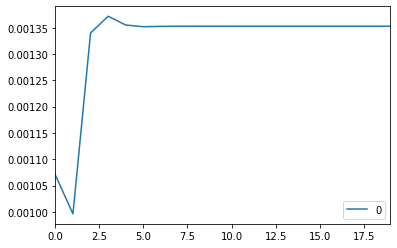

In [83]:
HowManyUnits = 20
forecastData = results.forecast(steps=HowManyUnits)
pd.DataFrame(forecastData[0]).plot()

## ARMA: Training and Testing Error

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  753
Model:                     ARMA(2, 1)   Log Likelihood                2067.775
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 26 Feb 2020   AIC                          -4125.551
Time:                        21:17:09   BIC                          -4102.431
Sample:                             0   HQIC                         -4116.644
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0014      0.001      2.547      0.011       0.000       0.002
ar.L1.Close     0.0801      0.397      0.202      0.840      -0.699       0.859
ar.L2.Close    -0.0561      0.036     -1.538      0.124      -0.128       0.015
ma.L1.Close    -0.0843      0.397     -0.212      0.832      -0.862       0.694
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7139           -4.1601j            4.2209           -0.2230
AR.2            0.7139           +4.1601j            4.2209            0.2230
MA.1           11.8636           +0.0000j           11.8636            0.0000
-----------------------------------------------------------------------------
"""

## Visualization

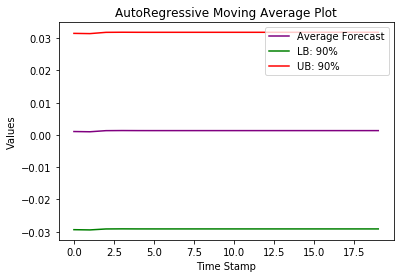

In [84]:
import matplotlib.pyplot as plt
plt.plot(forecastData[0], color = 'purple', label = f'Average Forecast')
plt.plot(pd.DataFrame(forecastData[2]).iloc[:, 0], color = 'green', label = f'LB: 90%')
plt.plot(pd.DataFrame(forecastData[2]).iloc[:, 1], color = 'red', label = f'UB: 90%')
plt.title(f'AutoRegressive Moving Average Plot')
plt.xlabel('Time Stamp')
plt.ylabel(f'Values')
plt.legend(loc='upper right')
plt.show()

## Software Management

In [89]:
# Define function
def MM_ARMA(ticker='AAPL', start_date='2017-01-01', end_date='2020-01-01',
           p=2, q=1, HowManyUnits = 20, verbose=True):
    
    ## Initiate Library
    import pandas as pd
    import numpy as np
    import datetime
    from pathlib import Path
    import yfinance as yf
    %matplotlib inline

    ## Get Data

    # Define function
    def getDatafromYF(ticker, start_date, end_date):
        stockData = yf.download(ticker, start_date, end_date)
        return stockData
    # End function

    stockData = getDatafromYF(tickers, '2017-01-01', '2020-01-01')
    stockData.head()

    returns = stockData['Close'].pct_change()
    returns = returns.dropna()
    stockData['Return'] = returns

    ## ARMA: Model Fitting

    # Import the ARMA model
    from statsmodels.tsa.arima_model import ARMA

    # Create the ARMA model using the return values and the order
    # For the order parameter, the first 1 indicates the number of AR lags
    # For the order parameter, the second 1 indicates the number of MA lags
    model = ARMA(returns, order=(p, q))

    # Fit the model to the data
    results = model.fit()

    ## ARMA: Prediction and Forecast
    forecastData = results.forecast(steps=HowManyUnits)
    #pd.DataFrame(forecastData[0]).plot()

    ## ARMA: Training and Testing Error
    if verbose:
        results.summary()

    ## Visualization
    import matplotlib.pyplot as plt
    if verbose:
        plt.plot(forecastData[0], color = 'purple', label = f'Average Forecast')
        plt.plot(pd.DataFrame(forecastData[2]).iloc[:, 0], color = 'green', label = f'LB: 90%')
        plt.plot(pd.DataFrame(forecastData[2]).iloc[:, 1], color = 'red', label = f'UB: 90%')
        plt.title(f'AutoRegressive Moving Average Plot')
        plt.xlabel('Time Stamp')
        plt.ylabel(f'Values')
        plt.legend(loc='upper right')
        plt.show()
    
    # Output
    return {
        'Model Result': {'All': results, 'Summary': results.summary()},
        'Forecast Data': forecastData,
        'Stock Data': stockData}
# End function

[*********************100%***********************]  1 of 1 completed


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


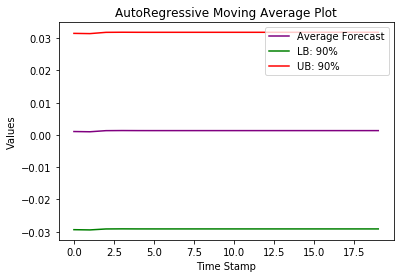

In [90]:
temp = MM_ARMA(ticker='AAPL', start_date='2017-01-01', end_date='2020-01-01',
           p=2, q=1, HowManyUnits = 20, verbose=True)

In [91]:
temp['Model Result']['Summary']

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  753
Model:                     ARMA(2, 1)   Log Likelihood                2067.775
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 26 Feb 2020   AIC                          -4125.551
Time:                        21:21:47   BIC                          -4102.431
Sample:                             0   HQIC                         -4116.644
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0014      0.001      2.547      0.011       0.000       0.002
ar.L1.Close     0.0801      0.397      0.202      0.840      -0.699       0.859
ar.L2.Close    -0.0561      0.036     -1.538      0.124      -0.128       0.015
ma.L1.Close    -0.0843      0.397     -0.212      0.832      -0.862       0.694
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7139           -4.1601j            4.2209           -0.2230
AR.2            0.7139           +4.1601j            4.2209            0.2230
MA.1           11.8636           +0.0000j           11.8636            0.0000
-----------------------------------------------------------------------------
"""

Investigation ends here.